# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_context('notebook')
warnings.filterwarnings('ignore')

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [5]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [6]:
inventories=pd.read_csv(LEGO_DATA_FOLDER+'/inventories.csv.zip')
colors=pd.read_csv(LEGO_DATA_FOLDER+'/colors.csv.zip')
inventory_parts=pd.read_csv(LEGO_DATA_FOLDER+'/inventory_parts.csv.zip')
inventory_sets=pd.read_csv(LEGO_DATA_FOLDER+'/inventory_sets.csv.zip')
parts=pd.read_csv(LEGO_DATA_FOLDER+'/parts.csv.zip')
part_categories=pd.read_csv(LEGO_DATA_FOLDER+'/part_categories.csv.zip')
sets=pd.read_csv(LEGO_DATA_FOLDER+'/sets.csv.zip')
themes=pd.read_csv(LEGO_DATA_FOLDER+'/themes.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [187]:
#sets_year=sets['year']
#inventory_parts_quantity=inventory_parts['quantity']
#inventory_parts_quantity=inventory_parts_quantity.convert_objects(convert_numeric=True)
for i in range(len(sets['year'])) :
    if sets['year'][i][0]=='-': sets['year'][i]=sets['year'][i][1:]
    if len(sets['year'][i])>4: sets['year'][i]=sets['year'][i][:4]
    if sets['year'][i][2]=='s': sets['year'][i]='19'+sets['year'][i][:1]+'5'
sets

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1975,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


In [189]:
for i in range(len(inventory_parts)) :
    if inventory_parts['quantity'][i]<0: 
        inventory_parts['quantity'][i]=0
inventory_parts

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f
5,3,2343,47,1.0,f
6,3,3003,29,1.0,f
7,3,30176,2,1.0,f
8,3,3020,15,1.0,f
9,3,3022,15,0.0,f


In [8]:
oldest=min(sets['year'])
youngest=max(sets['year'])
time_range=str(int(youngest)-int(oldest))
print ('the time range of the sets is '+time_range+' years' )

the time range of the sets is 67 years


In [175]:
mean_quantity=inventory_parts['quantity'].mean()
print ('the average quantity of the inventory parts is '+str(mean_quantity) )

the average quantity of the inventory parts is 2.7670542575540584


__\* 

1.In the 'sets' dataset, the value of 'year' is supposed to be 4-digit number (e.g. 1995, 2018 ),but we find there are several inconsistencies, mainly as follows:

    a. '70s' which refer to the period that lasted 10 years, when the code detects the type of inconsistency, we represent the mean year of the period for convenience in A 3.4 , e.g. 70s to 1975
    b. minus year; some values are minus while the numbers after are acceptable, so when the code detects the '-', it simply deletes the '-'
    c.5-digit year:some 5-digit data like 19788 are considered a second touch of keyboard for the last digit and we delete the last digit when we detect this.
After that the time range of data set is the number the maximun year (the latest year) minus  the minimum year (the earlist year).

2.In the 'inventory_parts' dataset, the value of 'quantity' is supposed to be a non-negative number interger according to its real meaning. There exists the number '-inf' in the dataset. When detecting the situation, the code turns the '-inf' to 0
   
   

\*__s\

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the luminance of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [122]:
# A 3.1
temp_sets=sets[['Car ' in name or 'Cars ' in name or 'car ' in name or 'cars ' in name or name.endswith('Car') or name.endswith('Cars') or name.endswith('car') or name.endswith('cars') for name in sets['name']]]
#sets_car_id=set_car['id']
#sets_car_id
sets_car=temp_sets
sets_car['inventory_id']=''
sets_car['set_id']=temp_sets['id']
sets_car['set_name']=temp_sets['name']
for i in range(len(sets_car)):
  
    temp_set_id=sets_car['set_id'].values[i]
    temp_inventory_id=inventory_sets[inventory_sets['set_id']==temp_set_id]['inventory_id'].values
    temp_set_name=sets_car['set_name'].values[i]
    sets_car['inventory_id'].values[i]=temp_inventory_id

    
temp_show=sets_car[sets_car['inventory_id']!=''][['inventory_id','set_id','set_name']]

temp_show




,inventory_id,set_id,set_name
27,[13941],10002-1,Railroad Club Car
50,"[10158, 13083]",10022-1,"Santa Fe Cars - Set II (dining, observation, o..."
53,"[10158, 13083]",10025-1,Santa Fe Cars - Set I (mail or baggage car)
142,[5358],10158-1,High Speed Train Car
154,[],10170-1,TTX Intermodal Double-Stack Car
182,[],10200-1,Custom Car Garage
250,[],1038-1,ERBIE the Robo-Car
295,[],10552-1,Creative Cars
325,[],10589-1,Rally Car
368,[],10665-1,Spider-Man: Spider-Car Pursuit


12    8556
26    2071
16    1964
3     1552
9     1191
23    1125
40    1116
1      744
27     742
44     462
37     428
2      410
35     409
15     405
47     278
36     275
28     270
46     268
0      250
41     234
Name: count, dtype: int64

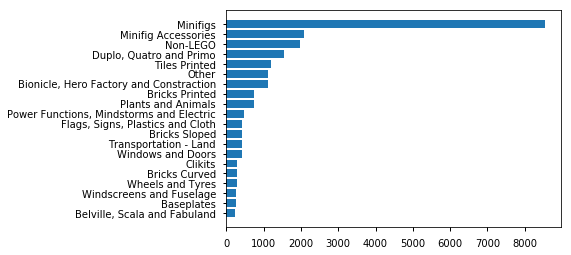

In [188]:
# A 3.2
part_categories['count']=0
for i in range(len(parts)):
    cat=int(parts['part_cat_id'][i])
    part_categories['count'][cat-1]=part_categories['count'][cat-1]+1 
part_categories
sort_cat=part_categories[['id','name','count']]
sort_cat=sort_cat['count'].sort_values(ascending=False).head(20)
id=sort_cat.index
x=part_categories['name'][id][::-1]
y=sort_cat.values[::-1]
#x=reversed(x)
#y=reversed(y)
plt.barh(x,y)
sort_cat




In [191]:
# A 3.3 dominant color of each set

inventory_sets['dominant_color_id']=0
inventory_sets['dominant_color']=''
#len(inventory_parts[inventory_parts['inventory_id']==18701])
for i in range(len(inventory_sets)):
        temp_id=inventory_sets['inventory_id'][i]
        temp_inventory=inventory_parts[inventory_parts['inventory_id']==temp_id]
        inventory_colors=colors
        inventory_colors['count']=0
        if len(temp_inventory)!=0:
            
            for j in range(len(temp_inventory)):
                temp=temp_inventory['color_id'].values[j]
                
                temp_color_index=inventory_colors[inventory_colors['id']==temp].index
                
                inventory_colors['count'][temp_color_index]=inventory_colors['count'][temp_color_index]+temp_inventory['quantity'].values[j]
            max_count=max(inventory_colors['count'])
            
            dom_id=inventory_colors[inventory_colors['count']==max_count]['id'].values
            dom_id=dom_id[0]
            inventory_sets['dominant_color_id'][i]=dom_id
            
            inventory_sets['dominant_color'][i]=colors[colors['id']==dom_id]['name'].values

             
            
        else: inventory_sets['dominant_color_id'][i]=-100
                #colors=colors[colors['id']==temp_color]
        

#inventory_sets

set_show=inventory_sets[inventory_sets['dominant_color_id']!=-100][['set_id','dominant_color_id','dominant_color','quantity']]
set_show




,set_id,dominant_color_id,dominant_color,quantity
16,10233-1,9999,[[No Color]],1
17,88002-1,9999,[[No Color]],1
18,8870-1,9999,[[No Color]],1
19,8878-1,9999,[[No Color]],1
20,8879-1,9999,[[No Color]],1
21,8884-1,9999,[[No Color]],1
82,8593-1,0,[Black],1
83,8596-1,0,[Black],1
140,7958-10,89,[Royal Blue],1
141,7958-11,89,[Royal Blue],1


,id,name,rgb,is_trans,count
0,-1,Unknown,0033B2,f,31
1,0,Black,05131D,f,34
3,2,Green,237841,f,4
5,4,Red,C91A09,f,2
16,15,White,FFFFFF,f,5
54,71,Light Bluish Gray,A0A5A9,f,3
55,72,Dark Bluish Gray,6C6E68,f,2
65,82,Metallic Gold,DBAC34,f,1
69,89,Royal Blue,4C61DB,f,43
92,178,Flat Dark Gold,B48455,f,6


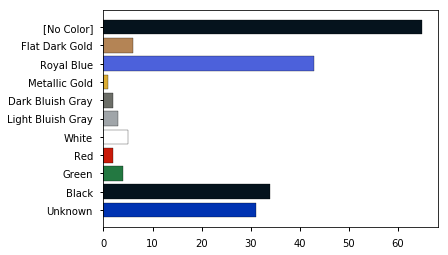

In [192]:
# A 3.3 Plot num of sets per color

colors_count=colors
colors_count['count']=0
for i in range(len(set_show)):
    temp_id=set_show['dominant_color_id'].values[i]
    temp_color_index=colors[colors['id']==temp_id].index
    colors_count['count'][temp_color_index]=colors_count['count'][temp_color_index]+set_show['quantity'].values[i]


colors_count=colors_count[colors_count['count']!=0]
colors_count
for i in range(len(colors_count)):
    x=colors_count['name'].values[i]
    y=colors_count['count'].values[i]
    plot_color=colors_count['rgb'].values[i]
    plot_color=str(plot_color)
    
    plt.barh(x,y,color='#'+plot_color,edgecolor='black')
    
colors_count




,set_id,dominant_color_id,dominant_color,quantity,year,rgb,luminance
2193,346-2,2,[Green],1,1969,237841,96.440266
2192,344-1,2,[Green],1,1969,237841,96.440266
2195,603-3,2,[Green],1,1975,237841,96.440266
2194,347-1,2,[Green],1,1975,237841,96.440266
2704,322-1,4,[Red],1,1981,C91A09,111.740525
1618,1064-1,15,[White],1,1981,FFFFFF,255.000000
1619,k1062b,15,[White],1,1981,FFFFFF,255.000000
1620,pk1062,15,[White],1,1981,FFFFFF,255.000000
1617,1062-1,15,[White],1,1985,FFFFFF,255.000000
371,9750-1,9999,[[No Color]],1,1986,05131D,17.755450


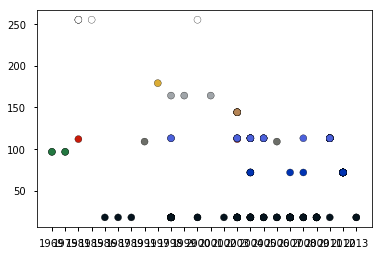

In [209]:
# A 3.4

import math
ex_set=set_show
ex_set['year']=''
ex_set['rgb']=''
ex_set['luminance']=0.0000
for i in range(len(ex_set)):
    temp_id=ex_set['set_id'].values[i]
    ex_set['year'].values[i]=sets[sets['id']==temp_id]['year'].values[0]
    temp_color=set_show['dominant_color_id'].values[i]
    temp_rgb=colors[colors['id']==temp_color]['rgb'].values[0]
    ex_set['rgb'].values[i]=temp_rgb
    
    r=int(temp_rgb[:2],16)
    g=int(temp_rgb[2:4],16)
    b=int(temp_rgb[4:],16)
    temp_luminance=math.sqrt(0.299*r*r+0.587*g*g+0.114*b*b)
    ex_set['luminance'].values[i]=temp_luminance
ex_set=ex_set.sort_values(ascending=True, by='year')    
x=ex_set['year']
y=ex_set['luminance']
plot_color=ex_set['rgb']
plt.scatter(x,y,color='#'+plot_color,edgecolor='black')
ex_set
    



__\* Briefly explain your approach for every query here \*__

A 3.1

Firstly, we look into the 'sets' dataset to find relavent set_ids with a name that contain the keyworld 'car' by detecting the existence of 'car' or 'cars' in the name of set. In case of the words like 'card', we judge a name with a word that ends with 'car' or 'Car', which means they are either end of the name or followed by a space. 

Once we detect a name that refers to cars, we store the name and  id of the corresponding set in a new dataframe, named as 'set_name' and  'set_id'. Then we look into the 'inventory_sets' dataset to find the corresponding inventory_ids of each set_id we have found, and list all ids in the 'inventory_id' of the newly created dataframe. 

At last, we print the names that refer to cars in sets with corresponding ids, and list all the ids of inventory that belong to detected sets.


A 3.2

At first, the code traverses the dataset 'parts' to detect the part_cat_id of each part and we create a copied category dataframe to count the number.

Once a category id of one part is detected, the count of the corresponding category id is added by 1. After the search in 'parts', we get the count number of each category in the new dataframe.

The code uses the function 'sort_value' to find the top 20 categories concerning their count numbers.

At last, we use horizental bar to plot the top 20 categories with the category names and count numbers.



A 3.3 

    THE FIRST PART: find the domiant color of each set

The domiant color of each set is determined by its corresponding inventory if availabe according to the given datasets. We traverse the dataset 'inventory_sets' to find the corresponding 'inventory_id' for sets. 

Then we code to search 'inventory_parts' to find the parts and related color_id of each inventory_id found before. We count the number of corresponding dominant color of each available inventory_id in 'inventory_parts' according to its corresponding colors and quantities of parts. In other words, once the code detects the color id of the parts of one inventory, the count number of the color id is added by the part quantity.

After that, the dominant color of each inventory_id is decided by the max count of each colors. If there are more than one colors that share the maximum count, our code chooses the color with smaller color id. 

Upon above, we have found the dominat color of each inventory_id in dataset 'inventory_parts'. Later our code turns back to datasets 'inventory_sets' to relate the inventory_id with set_id. (Since the length of 'inventory_parts' are larger than 'inventory_sets' and some set  id's in 'inventory_sets' have no corresponding inventory id's in 'inventory_part', only a small fraction of sets have available dominant color.)

In the last of the first part, the code creates a new dataframe to represent the sets whose dominant color information is available, as well as their corresponding color id , color name and quantity.

    ( We only show the sets whose color innformation is availabe according to the given datasets.)

    THE SECOND PART: number of sets per color and its plot
In the first part, we have got a new dataframe with the information of available sets and their color information. According to the dataframe, the code traverse the dataframe, that is, when the code detects the dominant color of the set in the dataframe, the count of the corresponding color is added by the set quantity. Upon this, we can get the count number of sets per color and add it into a copied 'colors' dataframe.

In the plotting section, we plot a horizantal bar chart with the name and count of each color in the dataframe created. The color of each bar in the plot is determined by the corresponding rgb value of the color. We also set black as the edgecolor to make some white bars available.

    (PS: In A 3.3 , the result is influenced by the clearning procedure of 'quantity' of inventory_parts in A 2. In our case, we turn the '-inf' value to '0'. If we change the cleaning procedure, some dominant colors of the sets can be different, e.g. set_id=='7670-1')


A 3.4

According to A 3.3, we have found the domiant colors of the sets if available in the datasets. Each dominant color refers to a corresponding 'rgb' value, that is, a 6-digit hexadecimal number. We code to transform each rgb value to decimal number, for example, the first 2 digits of rgb values correspond to demical value R. 

After that, we use the given formular to calculate each luminance of the dominant number of each set. Finally, we plot a scatter chat with the luminance of the set color and the year of sets. In the plot, the color each dartapoint correspond to its rgb value.

    (PS; The cleaning preocudure of 'year' in A 2 can influence the final plot accuracy.)

    Answers for Questions:
According to the plot, as time goes, the trend of set colors is fluctuating and tends to be more plentiful. For example, after 2000, there tends to be more colors than befor 2000, but there are less colors in recent years and the colors are mostly in low luminance. However, less luminant colors (particularly Black or No Color) have always been a trend. 



## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [140]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [141]:
bikes_data = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")

In [142]:
bikes_data.head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


In [143]:
bikes_data.shape

(132427, 14)

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [144]:
bikes_data.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

In [145]:
bikes_data.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


We have got the type of each attribute. For the `float64` and `int64` attributes, the value ranges are as above. 

"Passholder Type" and "Trip Route Category" are categorical attributes that need to be transformed into `Categorical`. 

In [146]:
bikes_data['Passholder Type'] = pd.Categorical(bikes_data['Passholder Type'])
bikes_data['Trip Route Category'] = pd.Categorical(bikes_data['Trip Route Category'])

In [147]:
bikes_data['Passholder Type'].describe()

count           132427
unique               4
top       Monthly Pass
freq             81304
Name: Passholder Type, dtype: object

In [148]:
bikes_data['Trip Route Category'].describe()

count      132427
unique          2
top       One Way
freq       119642
Name: Trip Route Category, dtype: object

Besides, "Start Time" and "End Time" should be transformed into `datetime64`.

In [149]:
bikes_data['Start Time'] = bikes_data['Start Time'].astype('datetime64')
bikes_data['End Time'] = bikes_data['End Time'].astype('datetime64')

In [150]:
bikes_data['Start Time'].describe()

count                  132427
unique                  97997
top       2016-07-14 11:38:00
freq                       15
first     2016-07-07 04:17:00
last      2017-03-31 23:45:00
Name: Start Time, dtype: object

In [151]:
bikes_data['End Time'].describe()

count                  132427
unique                  90933
top       2016-08-13 13:42:00
freq                       14
first     2016-07-07 04:20:00
last      2017-04-02 10:32:00
Name: End Time, dtype: object

There are redundant columns in the dataset.

- The "Duration" depends on the difference of "End Time" and "Start Time".

- The "Trip Route Category" depends on whether the "Starting Station ID" and the "Ending Station ID" are identical.

- The "Plan Duration" depends on the "Passholder Type".

Having such redundant columns in the dataset makes the storage occupying of the dataset to be unnecessarily larger. And if there are wrong data in the redundant columns, it makes the dataset more susceptible to inconsistencies. So we remove these redundant columns.

In [152]:
bikes_data_redundancy = bikes_data[['Duration','Trip Route Category','Plan Duration']]
bikes_data_reduced = bikes_data.drop(['Duration','Trip Route Category','Plan Duration'], axis=1)

In [153]:
bikes_data_redundancy.dtypes

Duration                  int64
Trip Route Category    category
Plan Duration           float64
dtype: object

In [154]:
bikes_data_redundancy.shape

(132427, 3)

In [155]:
bikes_data_reduced.dtypes

Bike ID                              float64
End Time                      datetime64[ns]
Ending Station ID                    float64
Ending Station Latitude              float64
Ending Station Longitude             float64
Passholder Type                     category
Start Time                    datetime64[ns]
Starting Station ID                  float64
Starting Station Latitude            float64
Starting Station Longitude           float64
Trip ID                                int64
dtype: object

In [156]:
bikes_data_reduced.shape

(132427, 11)

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

#### B3.1

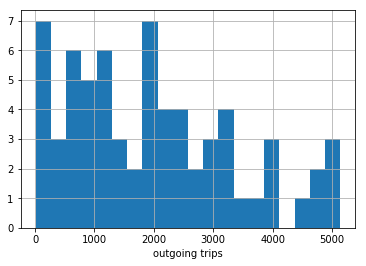

In [157]:
plt.xlabel('outgoing trips')
outgoing_trips_count = bikes_data['Starting Station ID'].value_counts()
outgoing_trips_count.hist(bins=20)

#### B3.2

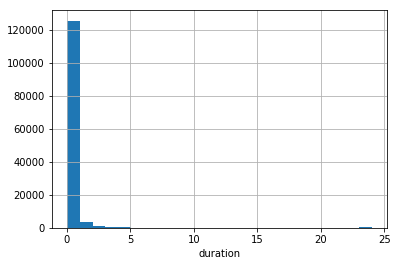

In [158]:
plt.xlabel('duration')
duration_hour = bikes_data_redundancy['Duration']/3600
duration_hour.hist(bins=24)

As most durations are less than 1 hour, we use a logarithm transform to make the plot easy to read.

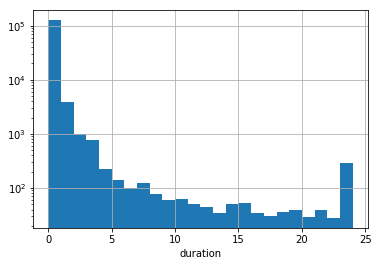

In [159]:
plt.xlabel('duration')
duration_hour.hist(bins=24, log=True)

From this plot, we could see that most of the duration are less than 1 hour, and it decreses rapidly as the duration increses, which approximately follows the power law. It is understandable that most people use the bike sharing service for a short trip and prefer cars or public transportation for a longer trip. An exception occurs at the 24-hour duration point, maybe because the service has an upper bound of 24 hours for the duration.

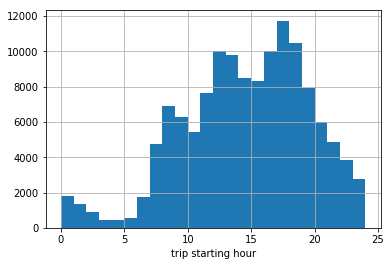

In [160]:
plt.xlabel('trip starting hour')
starting_hour = bikes_data['Start Time'].apply(lambda t: t.hour)
starting_hour.hist(bins=range(0,25))

There are some local maxima for the trip starting time, like 8:00-9:00, 12:00-13:00, 17:00-18:00. These are all traffic peaks when people go to work in the morning, go for a lunch at noon, and go home in the evening. Correspondingly the trip starting time frequency goes up and down around these traffic peaks. And between 0:00-6:00 the trips become much less because these are sleeping hours. The data is consistent with human behaviors.

#### B3.3

In [253]:
trips_table = bikes_data.groupby(['Passholder Type','Trip Route Category']).size().unstack()
proportion_table = (trips_table/trips_table.sum()).transpose()
proportion_table

Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,0.075509,0.648033,0.002499,0.273959
Round Trip,0.037779,0.295033,0.006492,0.660696


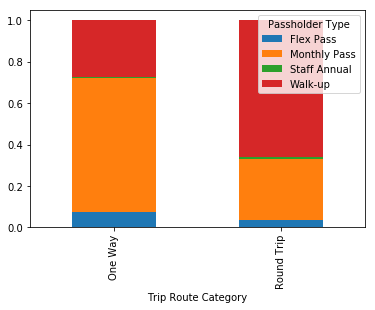

In [254]:
proportion_table.plot.bar(stacked=True)

#### B3.4

In [255]:
bikes_data_am = bikes_data[bikes_data['Start Time'].apply(lambda t: t.hour)<12]

In [259]:
trips_table_am = bikes_data_am.groupby(['Passholder Type','Trip Route Category']).size().unstack()
proportion_table_am = (trips_table_am/trips_table_am.sum().sum()).transpose()
proportion_table_am

Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,0.069487,0.643531,0.002541,0.196700
Round Trip,0.003300,0.027658,0.001021,0.055762


Note that we normalize the proportions by the total number of trips.

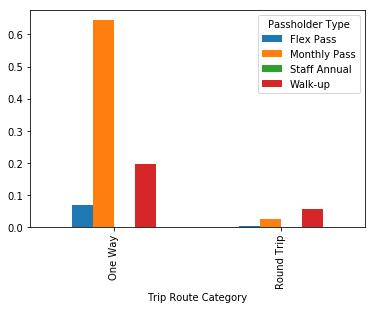

In [260]:
proportion_table_am.plot.bar()

Considering the trips in the morning, we can find that there are different patterns for one-way trips and round trips. "Monthly Pass" users are more likely to have a one-way trip while "Walk-up" users are more likely to have a round trip. From the data we know the plan duration of "Monthly Pass" is 30 and the plan duration of "Walk-up" is 0. So the "Monthly Pass" users may be those people who ride the bikes to go to work from home, and "Walk-up" users just happen to use the bike for a while and return it to the starting station.

#### B3.5

Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? 

In [261]:
bikes_data['Start Time'].apply(lambda t: t.hour).median()

14.0

Since the median number of the start hours is 14, we could seperate the hours of the day into two intervals 00:00:00-13:59:59 and 14:00:00-23:59:59.

In [262]:
bikes_data_seperate = bikes_data
bikes_data_seperate['Time Interval'] = ['Before 2PM' if t.hour<14 else 'After 2PM' for t in bikes_data['Start Time']]

In [263]:
trips_table_seperate = bikes_data_seperate.groupby(['Trip Route Category','Passholder Type','Time Interval']).size().unstack()
proportion_table_seperate = amount_table_seperate/amount_table_seperate.sum()

In [264]:
proportion_table_seperate

Time Interval                        After 2PM  Before 2PM
Trip Route Category Passholder Type                       
One Way             Flex Pass         0.067165    0.069572
                    Monthly Pass      0.569341    0.606178
                    Staff Annual      0.002069    0.002501
                    Walk-up           0.265233    0.224756
Round Trip          Flex Pass         0.003493    0.003846
                    Monthly Pass      0.026812    0.030630
                    Staff Annual      0.000376    0.000949
                    Walk-up           0.065512    0.061570

We've got the DataFrame above to campare the proportion of trips during the two different time intervals. As we can see, for the one-way trip, there are 4% more Monthly Pass users and 4% less Walk-up users before 2PM compared to the corresponding situation after 2PM. So a paying scheme for Monthly Pass users to pay less before 2PM may not be beneficial.